In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Sugar per Ton of Cane Models (Maturity Curves)
For forecasting purposes, experimental maturity curves for different sugar cane varieties are examined in order to identify key shape atributes. This is important for restricting the polynomial regression to a set of families and parameters.

The following is an extract of the 2004 paper "Sucrose Accumulation and Harvest Schedule Recommendations for CP Sugarcane Cultivars" (Robert A. Gilbert, James M. Shine Jr., Jimmy D. Miller, Ronald W. Rice), were a polynomial regression is performed using the Quadratic Standard Form.

"Sugarcane (Saccharum spp.) is harvested during a 5-month period (October to March) in the Everglades Agricultural Area (EAA) of south Florida. The genetic and temporal variability of sugarcane sucrose concentration is well established, but sucrose accumulation curves have not been reported for the Canal Point (CP) clones used in Florida since 1977. The objective of this study was to compare sucrose accumulation for recently released clones and provide harvest schedule recommendations based on this information. Thirteen CP clones were sampled at 2-week intervals throughout 4 consecutive harvest seasons. Based on seasonal changes in cultivar ranking in sugar per ton, recommended harvest scheduling relative to October 14 (time = 0 days) are: early-season (0 to 50 days) for cultivars CP 70-1133, CP 80-1743, and CP 88-1762; mid-season (50 to 100 days) for cultivars CP 78-1628 and CP 84-1198; and late-season (100 to 150 days) for cultivars CP 72-1210, CP 72-2086, CP 80-1827, CP 85-1382, CP 88-1508, and CP 89-2377. Sucrose accumulation in cultivar CP 89-2143 was greatest across all harvest periods and should be grown by Florida producers interested in improving the sucrose concentration of their crop."

https://acsess.onlinelibrary.wiley.com/doi/abs/10.1094/CM-2004-0402-01-RS

Regression Results Dataset: https://pubag.nal.usda.gov/download/11886/pdf


### Cuadratic Polynomial Regression General Form:
### $$y = \gamma * x^2 + \beta * x + \alpha $$

### Regression Results Dataset:

In [2]:
df = pd.read_csv(r'C:\Users\sbarrios\OneDrive - Universidad Galileo\Data Science\Python\Proyectos\Pruebas\Pantaleon\Optimizador Cosecha\CSV Varieties.csv')
df

,Sugar Cane Varieties,n,alpha,beta,gamma,R2,MaximumSPT,MaximumSPTdate
0,70-1133,446,207,1.10,-0.0049,0.37,268,Feb
1,72-1210,618,195,1.59,-0.0072,0.53,283,Feb
2,72-2086,647,204,1.38,-0.0056,0.61,290,Feb
3,78-1628,453,207,1.52,-0.0071,0.50,288,Jan
4,80-1743,748,219,1.05,-0.0051,0.26,274,Jan
5,80-1827,447,209,1.08,-0.0041,0.44,279,Feb
6,84-1198,647,197,1.45,-0.0066,0.36,276,Feb
7,85-1382,646,199,1.10,-0.0042,0.41,272,Feb
8,88-1508,447,204,1.28,-0.0054,0.53,279,Feb
9,88-1762,751,215,1.27,-0.0061,0.43,282,Jan


### Regression Results for SPT (lbs of sucrose/ton of cane)

In [3]:
def func(x, a, b, c):
    return a + b*x + c*x**2

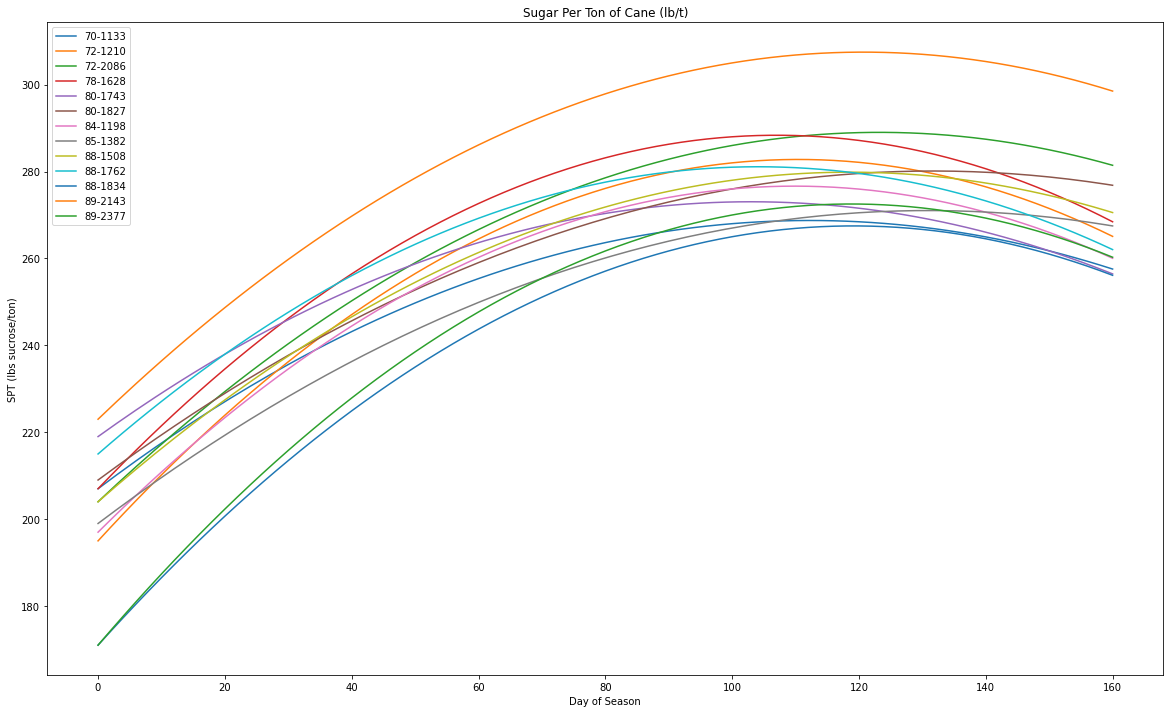

In [4]:
x = np.arange(0,161)
plt.figure(figsize=(20,12))
plt.title("Sugar Per Ton of Cane (lb/t)")
plt.xlabel("Day of Season")
plt.ylabel("SPT (lbs sucrose/ton)")
for variedad in df.index:
    y = func(x,df['alpha'][variedad],df['beta'][variedad],df['gamma'][variedad])
    plt.plot(x,y)
    
plt.show
plt.gca().legend(df['Sugar Cane Varieties'])

### Regression Results for SPT (kg of sucrose/ton of cane)

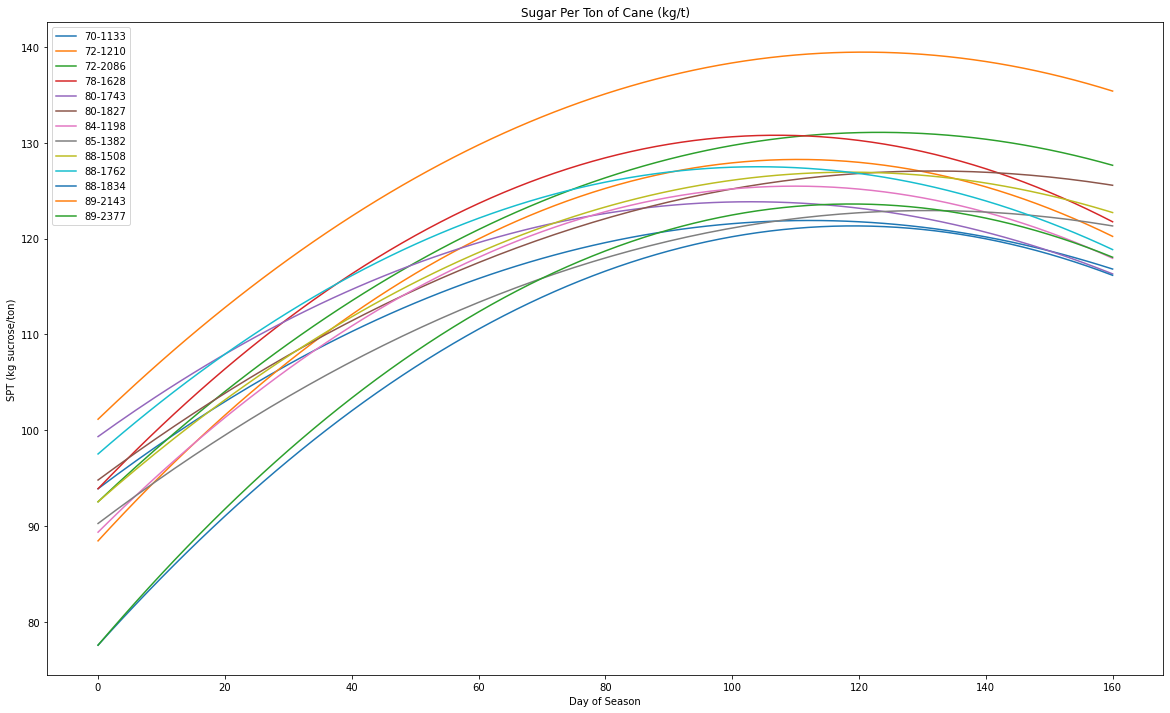

In [5]:
x = np.arange(0,161)
lb_to_kg = 1/2.20462
plt.figure(figsize=(20,12))
plt.title("Sugar Per Ton of Cane (kg/t)")
plt.xlabel("Day of Season")
plt.ylabel("SPT (kg sucrose/ton)")
for variedad in df.index:
    y = func(x,df['alpha'][variedad]*lb_to_kg,df['beta'][variedad]*lb_to_kg,df['gamma'][variedad]*lb_to_kg)
    plt.plot(x,y)
    
plt.show
plt.gca().legend(df['Sugar Cane Varieties'])

### Curvature Coefficients (kg sucrose / ton of cane)

In [6]:
df['alpha_kg'] = df['alpha']*lb_to_kg
df['beta_kg'] = df['beta']*lb_to_kg
df['gamma_kg'] = df['gamma']*lb_to_kg
df

,Sugar Cane Varieties,n,alpha,beta,gamma,R2,MaximumSPT,MaximumSPTdate,alpha_kg,beta_kg,gamma_kg
0,70-1133,446,207,1.10,-0.0049,0.37,268,Feb,93.893732,0.498952,-0.002223
1,72-1210,618,195,1.59,-0.0072,0.53,283,Feb,88.450617,0.721213,-0.003266
2,72-2086,647,204,1.38,-0.0056,0.61,290,Feb,92.532954,0.625958,-0.002540
3,78-1628,453,207,1.52,-0.0071,0.50,288,Jan,93.893732,0.689461,-0.003221
4,80-1743,748,219,1.05,-0.0051,0.26,274,Jan,99.336847,0.476273,-0.002313
5,80-1827,447,209,1.08,-0.0041,0.44,279,Feb,94.800918,0.489880,-0.001860
6,84-1198,647,197,1.45,-0.0066,0.36,276,Feb,89.357803,0.657710,-0.002994
7,85-1382,646,199,1.10,-0.0042,0.41,272,Feb,90.264989,0.498952,-0.001905
8,88-1508,447,204,1.28,-0.0054,0.53,279,Feb,92.532954,0.580599,-0.002449
9,88-1762,751,215,1.27,-0.0061,0.43,282,Jan,97.522476,0.576063,-0.002767


### Quadratic Polynomial Regression in Standard Form:
### $$y = a*(x-h)^2 + k$$

Where:

- ***a*** is the curvature parameter.
- ***h*** is the horizontal displacement parameter.
- ***k*** is the vertical displacement parameter.

In [7]:
df['a'] = df['gamma_kg']
df['h'] = df['beta_kg']*(-1/(2*df['a']))
df['k'] = df['alpha_kg'] - df['a']*(df['h']**2)
df

,Sugar Cane Varieties,n,alpha,beta,gamma,R2,MaximumSPT,MaximumSPTdate,alpha_kg,beta_kg,gamma_kg,a,h,k
0,70-1133,446,207,1.10,-0.0049,0.37,268,Feb,93.893732,0.498952,-0.002223,-0.002223,112.244898,121.896152
1,72-1210,618,195,1.59,-0.0072,0.53,283,Feb,88.450617,0.721213,-0.003266,-0.003266,110.416667,128.267570
2,72-2086,647,204,1.38,-0.0056,0.61,290,Feb,92.532954,0.625958,-0.002540,-0.002540,123.214286,131.096451
3,78-1628,453,207,1.52,-0.0071,0.50,288,Jan,93.893732,0.689461,-0.003221,-0.003221,107.042254,130.794474
4,80-1743,748,219,1.05,-0.0051,0.26,274,Jan,99.336847,0.476273,-0.002313,-0.002313,102.941176,123.850876
5,80-1827,447,209,1.08,-0.0041,0.44,279,Feb,94.800918,0.489880,-0.001860,-0.001860,131.707317,127.061331
6,84-1198,647,197,1.45,-0.0066,0.36,276,Feb,89.357803,0.657710,-0.002994,-0.002994,109.848485,125.482011
7,85-1382,646,199,1.10,-0.0042,0.41,272,Feb,90.264989,0.498952,-0.001905,-0.001905,130.952381,122.934478
8,88-1508,447,204,1.28,-0.0054,0.53,279,Feb,92.532954,0.580599,-0.002449,-0.002449,118.518519,126.938816
9,88-1762,751,215,1.27,-0.0061,0.43,282,Jan,97.522476,0.576063,-0.002767,-0.002767,104.098361,127.506082


### Negative Quadratic Shape Parameters

In [11]:
# Create a sample DataFrame
data = {'Parameter': [],
        'Mean': [],
        'Max': [],
        'Min': []}
parameters_df = pd.DataFrame(data)

# Curvature Parameter
df2 = pd.DataFrame({"Parameter":['Curvature'],
                    "Mean":[df['a'].mean()],
                    "Max":[df['a'].max()],
                    "Min":[df['a'].min()]})

# Horizontal Displacement Parameter
df3 = pd.DataFrame({"Parameter":['Horizontal Displacement'],
                    "Mean":[df['h'].mean()],
                    "Max":[df['h'].max()],
                    "Min":[df['h'].min()]})

# Vertical Displacement Parameter
df4 = pd.DataFrame({"Parameter":['Vertical Displacement'],
                    "Mean":[df['k'].mean()],
                    "Max":[df['k'].max()],
                    "Min":[df['k'].min()]})

# Concat dataframes
pd.concat([parameters_df, df2, df3, df4], ignore_index=True)


,Parameter,Mean,Max,Min
0,Curvature,-0.002655,-0.001860,-0.003266
1,Horizontal Displacement,116.118588,131.707317,102.941176
2,Vertical Displacement,126.942147,139.471999,121.329433
